<h1 style='color:#EBCEDA'><center>Heart Attack EDA and Predictive Analysis
</center></h1>
<br>

In this project we are dealing with a Machine Learning problem that tackles with the subject of when a person is most likely to undergo a heart failure,based on his age,chest-pain type,weight and other dependencies.
<br>

In the problem we are about to solve,we are dealing with a Supervised Machine Learning Problem,because in this problem we are to predict a value based on some historical data that we got our hands on.A similar problem would be one that provided us with historical data of house prices based on the features of the houses that have been sold up until now and wants us to predict the value of a house that is listing in the market right now.

<h2 style='color:#EBCEDA'><center>Getting to know the data</center></h2>


<h3 style='color:#c1f9a2'><center>Data Glossary</center></h3>

1. age - *The Age of the patient*

2. sex - *The Gender of the patient*

3. cp - *Chest Pain Type--> 0:Typical Angina,1:Atypical Angina,2:Non-anginal Pain,3:Asymptomatic*

4. trtbps - *Resting blood pressure(in mm/Hg)*

5. chol- *Cholesterol in mg/dl fetched bia BMI sensor*

6. fbs -*(Fasting blood sugar > 120mg/dl),1:True,0:False*

7. restecg - *Resting electrocardiographic results,0= Normal,1= ST-T wave normality,2=Left ventricular hypertrophy*

8. thalachh - *Maximum heart rate achieved*

9. Oldpeak - *Previous Peak*

10. slp - *Slope*

11. caa - *Number of major vessels*

12. thall - *Thalium Stress Test Results*

13. exng - *Exercise induced angina, 1:Yes 0:No*

14. output - *Target variable*

<h2 style='color:#EBCEDA'><center>Tasks to perform</center></h2>
<p><center>To perfrom Exploratory Data Analysis and deploy machine learning models for predictive analysis</center></p>

<h3 style='color:#c1f9a2'><center>Preparation</center></h3>
<p><center>Installing the Packages that we are going to use on this project</center></p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
# Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,mean_squared_error

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

<h2 style='color:#EBCEDA'><center>Importing the data that we are going to work on</center></h2>

In [3]:
df=pd.read_csv('C:/Users/Kostas/Documents/Kaggle Datasets/heart.csv')

<h2 style='color:#EBCEDA'><center>Understanding the Data</center></h2>

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print('The shape of the dataframe that we are working with is: ',df.shape)

The shape of the dataframe that we are working with is:  (303, 14)


<p><center>Judging from the print fucntion above,the dataframe has 303 rows and 14 columns.Let's now see some additional info about our data,using some other known functions</center></p>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<p style='color:#c1f9a2'><center>Now we are going to see what types of data our dataframe has</center></p> 

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

We see that Python interprets all of the columns as numerical,but a lot of these columns can be interpreted as categorical and we need to find which!

But first let's see the unique values for each and every column.

In [8]:
dict={}

for column_name in df:
    dict[column_name]=df[column_name].value_counts().shape[0]

pd.DataFrame(dict,index=['Unique Values per Column']).transpose()

,Unique Values per Column
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


Now we are going to separate the numerical from the categorical columns,and this early we are going to set the column that we are going to predict upon.

In [9]:
category_columns=['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_columns=['age','trtbps','chol','thalachh','oldpeak']
target_column=['output']
print('The numerical columns are:', continuous_columns)
print('The categorical columns are:',category_columns)
print('The target column is:', target_column)

The numerical columns are: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The categorical columns are: ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The target column is: ['output']


<p><center>Summarization of the data</center></p>

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<p><center>Checking if there are any missing values</center></p>

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<p><center>We see that in this dataset there are no missing values that we need to fil in.</center></p>

<h2 style='color:#EBCEDA'><center>Exploratory Data Analysis</center></h2>>

<p>

In [12]:
#Let's again take a look at the DataFrame
df.head()
category_columns

['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

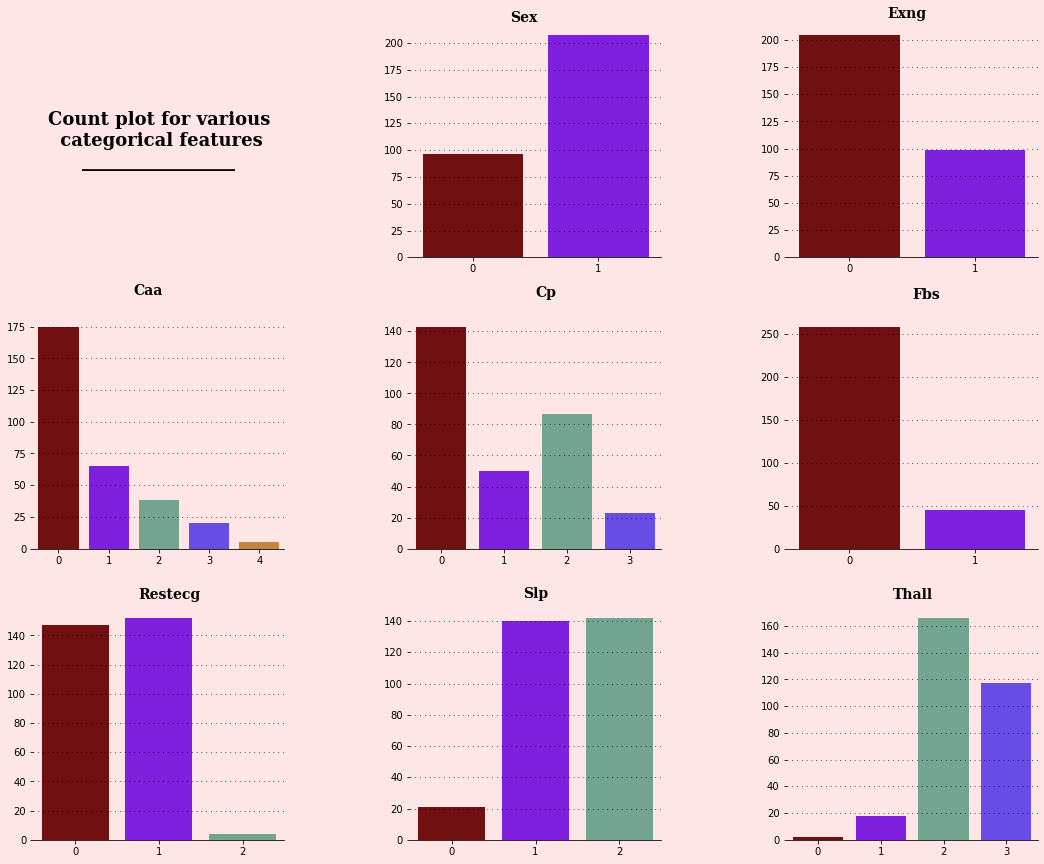

In [13]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

In [14]:
#Let's first take a look and see which columns are we talking about.
print('The continuous columns of this dataframe are:',continuous_columns)

The continuous columns of this dataframe are: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


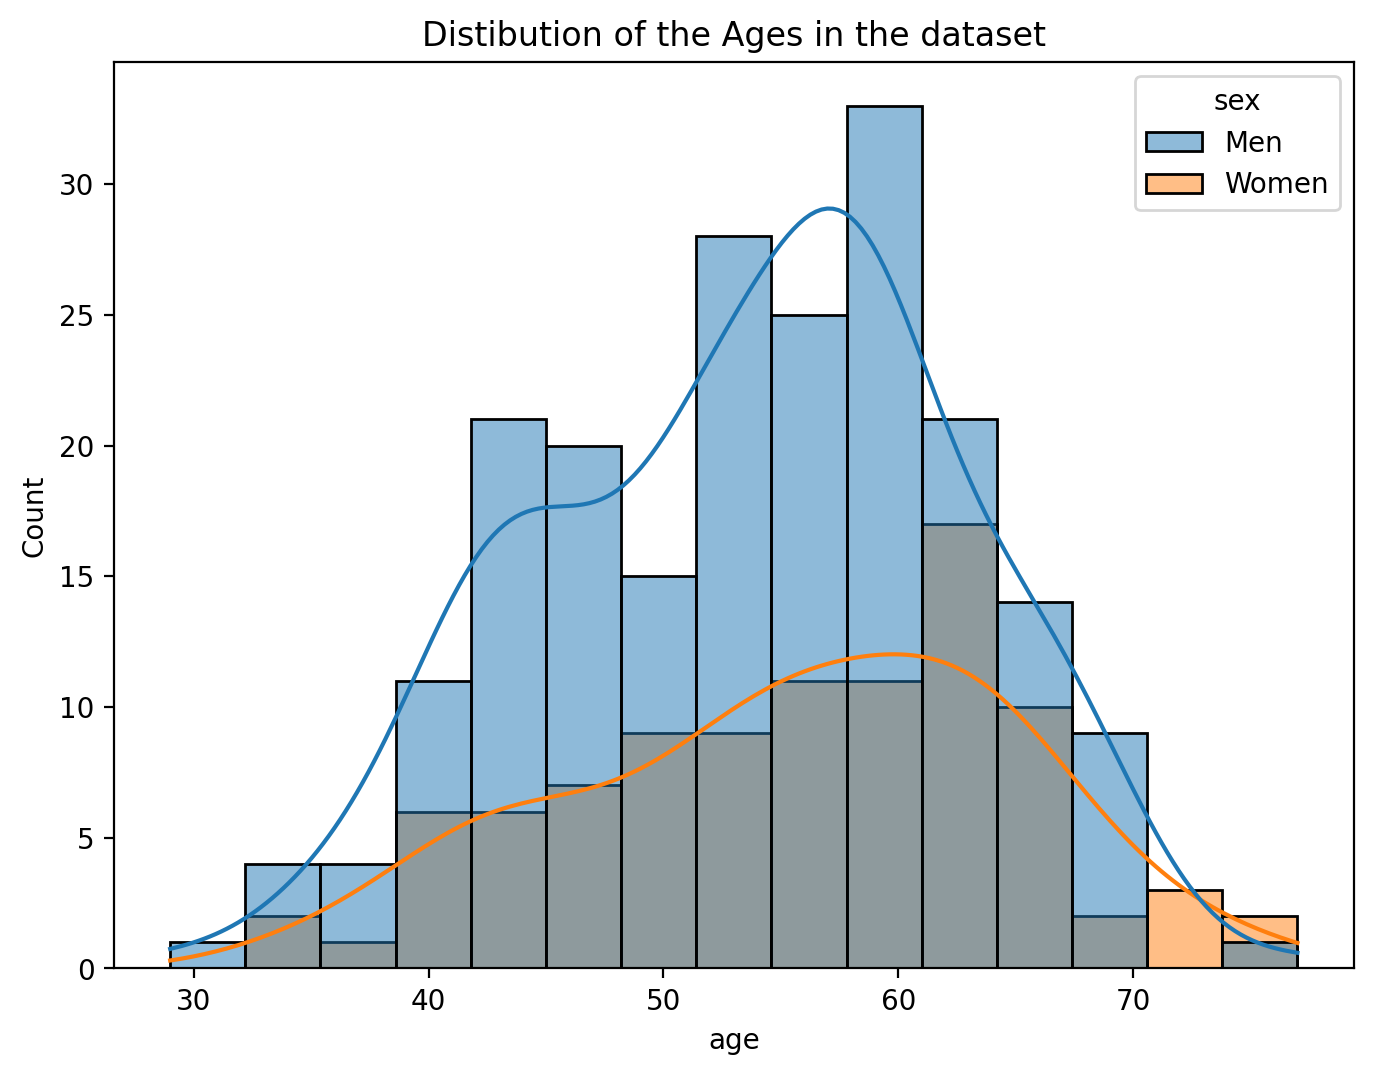

In [15]:
fig=plt.figure(figsize=(8,6),dpi=200)
sns.histplot(data=df,x=df['age'],kde=True,bins=15,hue=df['sex'].map({0:'Women',1:'Men'}))
plt.title('Distibution of the Ages in the dataset')
plt.show()


We can clearly see that in this dataframe we have a lot more men listed in it that suffer from heart related diseaases and heart failures in general.

But is this really the case??

We need to answer this finding the average percentage of men that suffer from heart failure and the average percentage of women suffering.

In [16]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

So we see that we have a lot more men than women.

Let's start with some conditional filtering and check the average percentage of men and women suffering from heart failures.

In [17]:
print('Of the 96 women in the dataframe those who suffered from Heart Failure are: ',len(df[(df['sex']==0) & (df['output']==1)]))
print('Of the 207 men of the dataframe,those who suffered from Heart Failure are: ',len(df[(df['sex']==1) & (df['output']==1)]))

Of the 96 women in the dataframe those who suffered from Heart Failure are:  72
Of the 207 men of the dataframe,those who suffered from Heart Failure are:  93


Now let's see the exact percentages

In [18]:
men_percentage=len(df[(df['sex']==1) & (df['output']==1)])/207*100
women_percentage=len(df[(df['sex']==0) & (df['output']==1)])/96*100

print('The percentage of men with heart failures is: ',round(men_percentage,1))
print('The percentage of women with heart failures is: ',women_percentage)

The percentage of men with heart failures is:  44.9
The percentage of women with heart failures is:  75.0


So our initial assumption that was stating that men suffer a lot more from heart failures is wrong.

At least it does not validate itself mathematically,because we can cleary see that a larger percentage of women is suffering from heart diseases.

Although,we must take this conclusion with a grain of salt.We are analyzing the data that we already  have in our hands.Note that this dataframe and the samples in it is rather small so the sample size might not be indicative of the actual percentages according to sex.



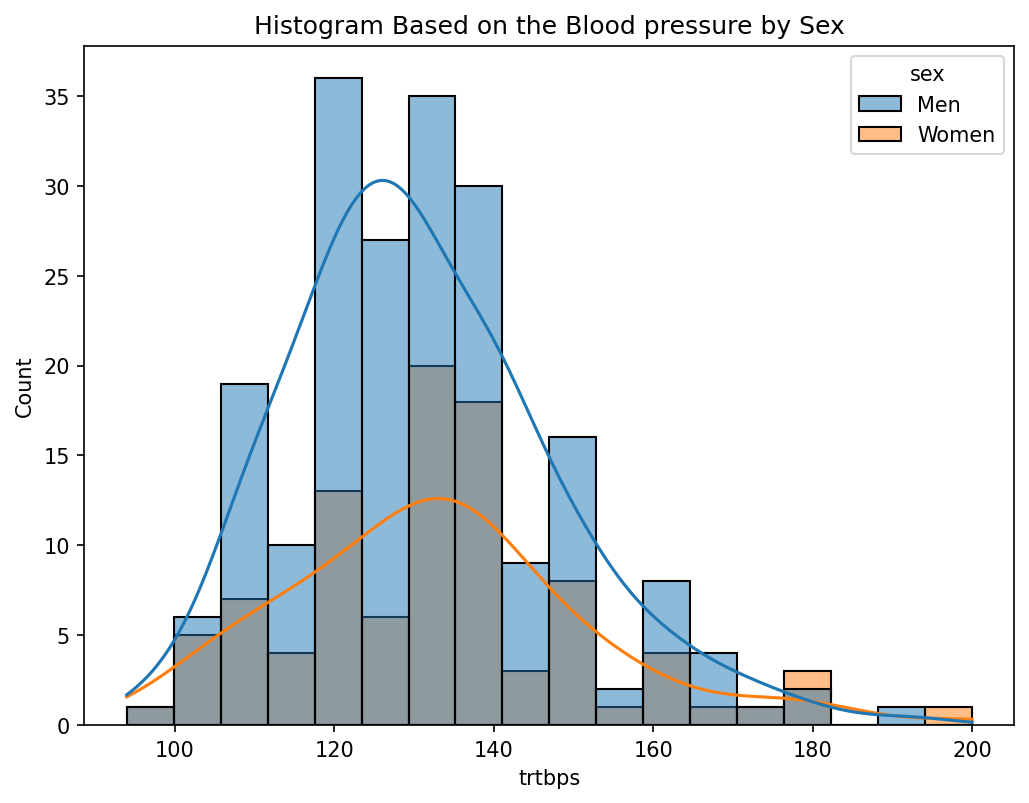

In [19]:
#Now let's analyse the trtbps column to see if any pattern emerges from this column.
fig=plt.figure(figsize=(8,6),dpi=150)
sns.histplot(data=df,x='trtbps',hue=df['sex'].map({0:'Women',1:'Men'}),kde=True)
plt.title('Histogram Based on the Blood pressure by Sex')
plt.show()


We can clarly see that the the majority of the Blood Pressure samples are located between the 120-140 mark.

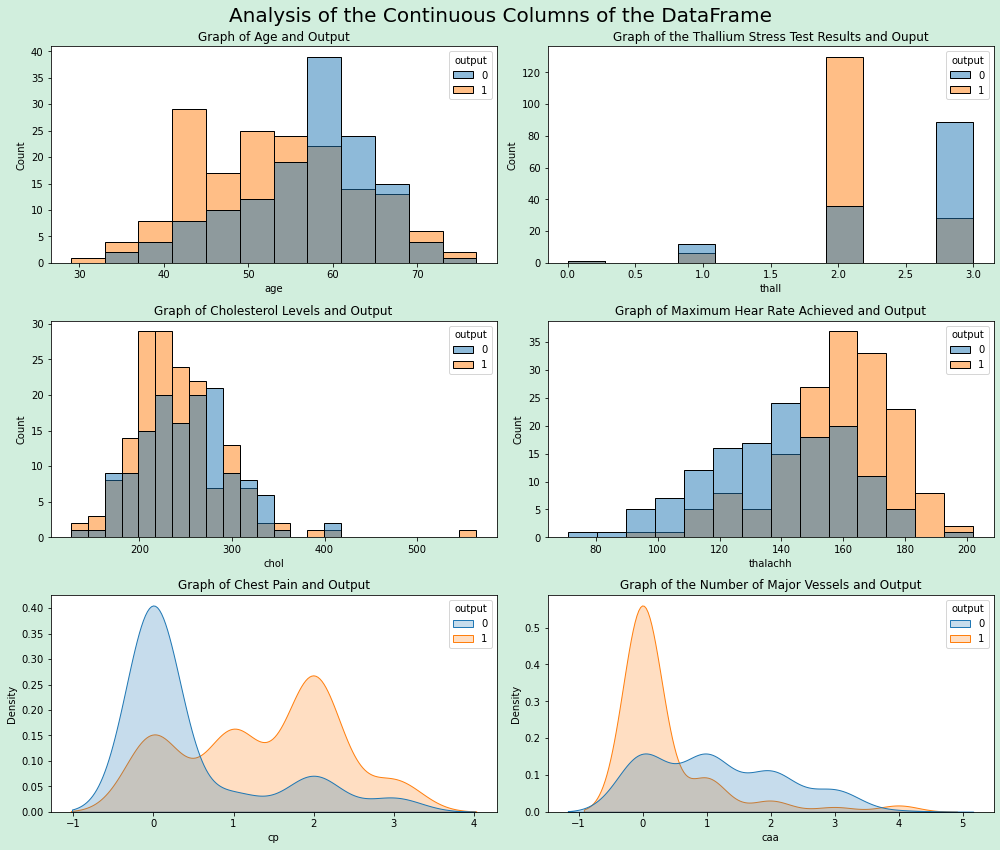

In [20]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(14,12))
fig.set_facecolor('#D1EEDD')
fig.suptitle('Analysis of the Continuous Columns of the DataFrame',fontsize=20)
sns.histplot(data=df,x='age',hue='output',ax=axes[0][0])
sns.histplot(data=df,x='thall',hue='output',ax=axes[0][1])
sns.histplot(data=df,x='chol',hue='output',ax=axes[1][0])
sns.histplot(data=df,x='thalachh',hue='output',ax=axes[1][1])
sns.kdeplot(data=df,x='cp',hue='output',ax=axes[2][0],fill=True)
sns.kdeplot(data=df,x='caa',hue='output',ax=axes[2][1],fill=True)
axes[0][0].set_title('Graph of Age and Output')
axes[0][1].set_title('Graph of the Thallium Stress Test Results and Ouput')
axes[1][0].set_title('Graph of Cholesterol Levels and Output')
axes[1][1].set_title('Graph of Maximum Hear Rate Achieved and Output')
axes[2][0].set_title('Graph of Chest Pain and Output')
axes[2][1].set_title('Graph of the Number of Major Vessels and Output')
plt.tight_layout()
plt.show()


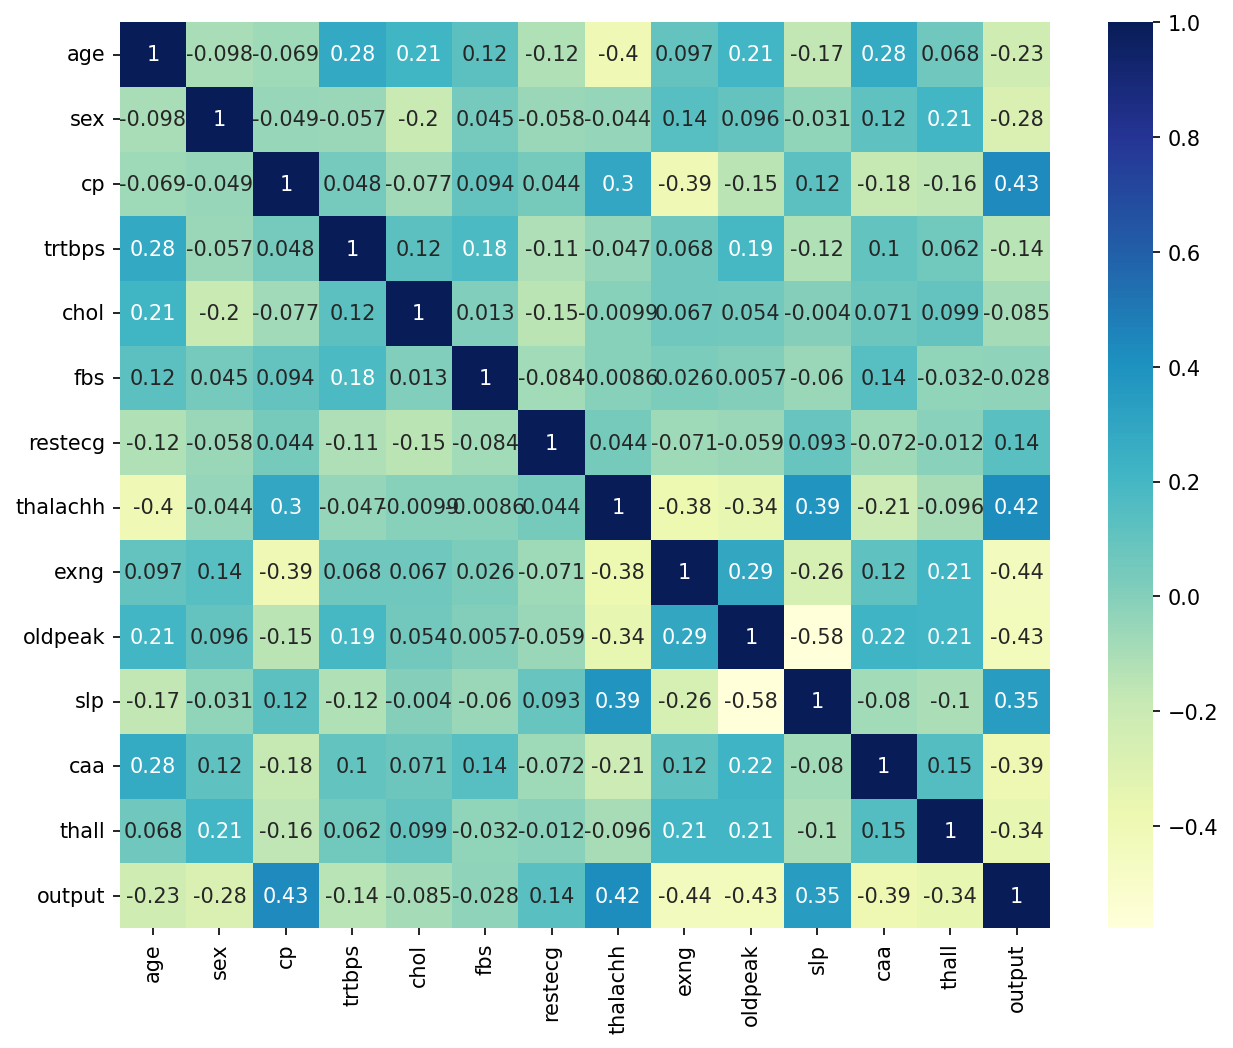

In [21]:
fig=plt.figure(figsize=(10,8),dpi=150)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

Now we are going to see the correlation between the values and the feature we want to explore.

In [22]:
df.corr()['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<Figure size 864x864 with 0 Axes>

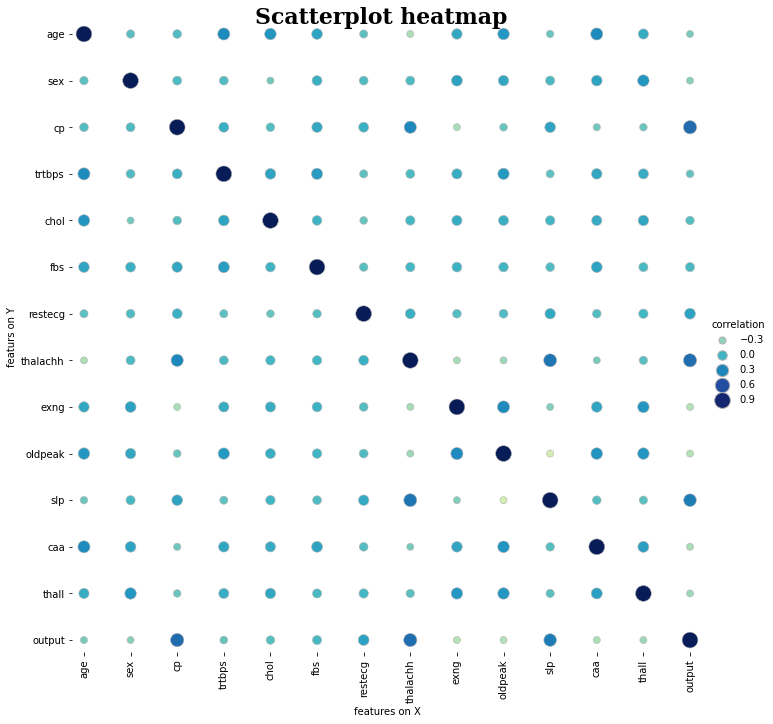

In [23]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

<h2 style='color:#EBCEDA'><center>Machine Learning Model Deployment and Accuracy Metrics</center></h2>

<center> Data Preproccesing and making Features Model</center>

In [24]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

#Perform the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#Because we have different units of measurements for the different features we will
#perform a scaling using the StandardScaler Module
scaler=StandardScaler()
scaler.fit(X_train)  #We are only fitting X_train to prevent data leakage.
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [25]:
print('The shape of X_train is now:',X_train.shape)
print('The shape of the X_test is:',X_test.shape)

The shape of X_train is now: (242, 22)
The shape of the X_test is: (61, 22)


In [26]:
print('Now the X_train looks like this:',df1.head())

Now the X_train looks like this:    age  trtbps  chol  thalachh  oldpeak  output  sex_1  exng_1  caa_1  caa_2  \
0   63     145   233       150      2.3       1      1       0      0      0   
1   37     130   250       187      3.5       1      1       0      0      0   
2   41     130   204       172      1.4       1      0       0      0      0   
3   56     120   236       178      0.8       1      1       0      0      0   
4   57     120   354       163      0.6       1      0       1      0      0   

   ...  cp_2  cp_3  fbs_1  restecg_1  restecg_2  slp_1  slp_2  thall_1  \
0  ...     0     1      1          0          0      0      0        1   
1  ...     1     0      0          1          0      0      0        0   
2  ...     0     0      0          0          0      0      1        0   
3  ...     0     0      0          1          0      0      1        0   
4  ...     0     0      0          1          0      0      1        0   

   thall_2  thall_3  
0        0        0

<h2><center>Modeling</center></h2>
<center>Suport Vector Machines</center>



In [27]:
# instantiating the object and fitting
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train.values.ravel())

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8360655737704918


<center>Hyperparameter Tuning for Support Vector Machines</center>

In [28]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train.values.ravel())

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 7, 'gamma': 0.001}
The best score is   : 0.8430272108843537
The test accuracy score of SVM after hyper-parameter tuning is  0.8524590163934426


<center>Logistic Regression</center>

In [29]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train.values.ravel())

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8852459016393442


<center>ROC Curve</center>

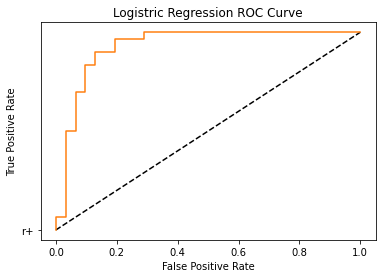

In [30]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

<center>Tree Models</center>

In [31]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train.values.ravel())

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.8032786885245902


<center>Random Forest</center>

In [32]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train.values.ravel())

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.8032786885245902


<h2 style='color:#EBCEDA'><center>Conclusions and Insights</center></h2>>

1. *This dataset contains a lot more men than women* 

2. *Percentage wise more women suffer from heart diseases than men as it seems from this dataset*

3. *We might want to take some of the caveats that stem from this DataFrame*

4. *According to the Histogram of Ages,we see a big accumulation of heart Diseases between the ages of 50-60.This really seems to be the danger-zone for a lot of people,because it seems that heart related problems arise in the people of this age group.*

5. *It is intuitive that elder people might have higher chance of heart attack  but according to the distribution plot of age and and the output,it is evident that this is not the case.People in the age group of 50-60 have the higher chances of suffering from heart related diseases.*

6. *We can see form the subplots that people that achieved in general a hihger heart rate than the others,have a higher chance of suffering from heart failure compared with the ones with lower heart rate.*

7. *From the subplots we can draw the conclusion that in general people with type 0 chest pain and type 2 chest pain tend to have more heart related problems than patients with other than 0 and 2 type chest pain.*

8. *We see that people with 0 major vessels have the highest chance of suffering from a heart disease*

9. *We see that people with cholesterol levels that range from 200-250 have the highest chance of suffering from heart related problems.*

10. *Viewing the correlation plots we can clearly see that there is not a very strong correlation between the feature upon examination which is the output and another feature except cp,thalachh,and slp*

11. *The highest correlation between the output and features is between the cp,thalachh and slp but even those values do not correlate so much with the feature output,meaning that a unit increse in cp will only lead to only 0.46 in an increase in output.*

12. *From the machine learning models that we have deployed we can clearly see that the LogisticRegression model performed the best out of all the other models.*